In [1]:
# Chapter 2: Fully Connected Networks

In [2]:
%run P0_Classes_And_Functions.ipynb
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *

In [3]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device=("cuda" if torch.cuda.is_available() else "cpu")):
    optimizer = torch.optim.SGD(model.parameters(),lr=0.001)
    model.to(device)
    
    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()
        running_loss = 0.0
        
        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)
            
            optimizer.zero_grad()
            
            y_hat = model(inputs)
            loss = loss_func(y_hat, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()


<AxesSubplot:>

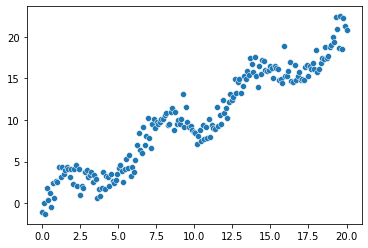

In [4]:
X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

In [5]:
class SimpleDRegressionDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)
        
    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)
    
    def __len__(self):
        return self.X.shape[0]
    
training_loader = DataLoader(SimpleDRegressionDataset(X, y), shuffle=True)

In [9]:
## Loss function
in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)
loss = torch.nn.MSELoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_simple_network(model, loss, training_loader, device = device)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<AxesSubplot:>

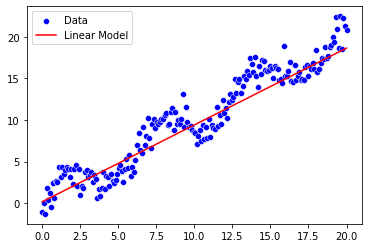

In [23]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), device = device, dtype=torch.float32)).cpu().numpy()
    
sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label="Linear Model")

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

<AxesSubplot:>

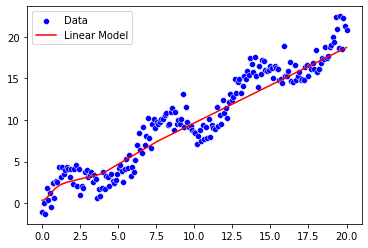

In [27]:
model_test = nn.Sequential(
    nn.Linear(1,100),
    nn.ReLU(),
    nn.Linear(100,1)
)
loss = torch.nn.MSELoss()

train_simple_network(model_test, loss, training_loader, device=device)

with torch.no_grad():
    Y_pred = model_test(torch.tensor(X.reshape(-1,1), device = device, dtype=torch.float32)).cpu().numpy()
    
sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label="Linear Model")